# Flu model tutorial

## Setup

In [1]:
import logging
import sys

root = logging.getLogger()
if root.handlers:
    root.handlers.clear()

logging.basicConfig(
    level=logging.INFO,
    stream=sys.stdout,
    format="%(asctime)s %(name)s %(levelname)s: %(message)s",
)

In [2]:
from flumodelingsuite.config_loader import (
    setup_epimodel_from_config,
    load_model_config_from_file,
    validate_config
)

In [4]:
from epydemix.visualization import plot_quantiles
from epydemix import EpiModel

In [9]:
# Load model configuration from YAML file
# This returns a validated config instance
model_config = load_model_config_from_file("data/input-flu.yml")

2025-08-21 19:18:15,736 flumodelingsuite.config_validator INFO: Configuration validated successfully.
2025-08-21 19:18:15,736 flumodelingsuite.config_loader INFO: Configuration loaded successfully.


In [10]:
# Now, we construct an EpiModel using that config
model = setup_epimodel_from_config(model_config)

2025-08-21 19:18:16,654 flumodelingsuite.config_loader INFO: Model population set to: United_States_Massachusetts
2025-08-21 19:18:16,654 flumodelingsuite.config_loader INFO: Added compartments: ['S', 'S_vax', 'L', 'L_vax', 'I_S,T', 'I_S,NT', 'I_A', 'I_vax_S,T', 'I_vax_S,NT', 'I_vax_A', 'Home_S', 'Home_M', 'Home_A', 'Home_vax_S', 'Home_vax_M', 'Home_vax_A', 'H', 'H_vax', 'R_S', 'R_M', 'R_A', 'R_vax_S', 'R_vax_M', 'R_vax_A']
2025-08-21 19:18:16,655 flumodelingsuite.config_loader INFO: Added multi-mediated transition: S -> L (mediators: [('beta', ['I_S,T', 'I_S,NT', 'I_vax_S,T', 'I_vax_S,NT']), ('r_asymp * beta', ['I_A', 'I_vax_A'])])
2025-08-21 19:18:16,655 flumodelingsuite.config_loader INFO: Added spontaneous transition: L -> I_S,T (rate: p_test * (1 - p_asymp) * epsilon)
2025-08-21 19:18:16,655 flumodelingsuite.config_loader INFO: Added parameters: ['r_vax', 'r_asymp', 'p_test', 'p_asymp', 'p_hospital', 'beta', 'beta_vax', 'epsilon', 'mu', 'mu_H', 'delta']
2025-08-21 19:18:27,640 flu

In [19]:
model.add_parameter("beta", 0.1)

In [20]:
model

EpiModel(name='flu_round05')
Compartments: 24
  S, S_vax, L, L_vax, I_S,T, I_S,NT, I_A, I_vax_S,T, I_vax_S,NT, I_vax_A, Home_S, Home_M, Home_A, Home_vax_S, Home_vax_M, Home_vax_A, H, H_vax, R_S, R_M, R_A, R_vax_S, R_vax_M, R_vax_A
Transitions: 3
  Transitions between compartments:
    S -> L, params: [('beta', ['I_S,T', 'I_S,NT', 'I_vax_S,T', 'I_vax_S,NT']), ('r_asymp * beta', ['I_A', 'I_vax_A'])] (kind: mediated_multi)
    L -> I_S,T, params: p_test * (1 - p_asymp) * epsilon (kind: spontaneous)
    S -> S_vax, params: (array([[20457., 45641., 65837., 41794., 40051.],
       [20457., 45641., 65837., 41794., 40051.],
       [20457., 45641., 65837., 41794., 40051.],
       ...,
       [    0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.]], shape=(260, 5)),) (kind: vaccination)
Parameters: 11
  Model parameters:
    r_vax: 0.30000000000000004
    r_asymp: 0.5
    p_test: 0.5
    p_asymp: 0.5
    p_hospita

In [21]:
date_start = model_config.model.simulation.start_date
date_end = model_config.model.simulation.end_date

In [24]:
results = model.run_simulations(
    start_date=date_start,
    end_date=date_end,
    initial_conditions_dict={
        "S": (0.33 * model.population.Nk),
        "S_vax": (0.33 * model.population.Nk),
        "L": (0.1 * model.population.Nk),
        "L_vax": (0.1 * model.population.Nk),
        "I_S,T": (0.05 * model.population.Nk),
        "I_S,NT": (0.05 * model.population.Nk),
        "I_vax_S,T": (0.01 * model.population.Nk),
        "I_vax_S,NT": (0.01 * model.population.Nk),
        "I_vax_A": (0.01 * model.population.Nk),
        "I_A": (0.01 * model.population.Nk),
    },
    dt=0.01
)


RuntimeError: Simulation failed: index 260 is out of bounds for axis 0 with size 260

In [ ]:
df_quantiles = results.get_quantiles_compartments()

In [ ]:
df_quantiles["all_S_total"] = df_quantiles[["S_total", "S_vax_total"]].sum(axis=1)
df_quantiles["all_I_total"] = df_quantiles[["I_S,T_total", "I_S,NT_total", "I_A_total", "I_vax_S,T_total", "I_vax_S,NT_total", "I_vax_A_total"]].sum(axis=1)
df_quantiles['all_L_total'] = df_quantiles[['L_total', "L_vax_total"]].sum(axis=1)

NameError: name 'df_quantiles' is not defined

In [ ]:
df_quantiles["all_S_total"]

NameError: name 'df_quantiles' is not defined

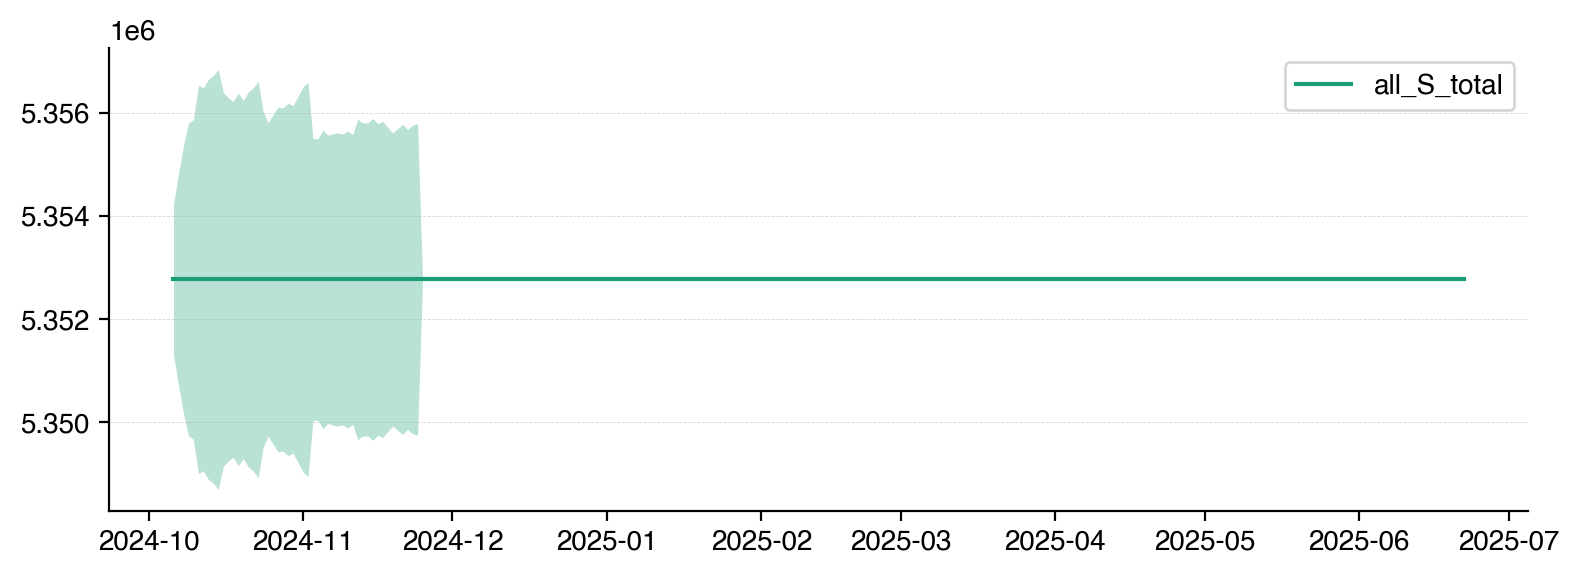

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,3))

# ax.scatter(x, y, marker='o', lw=0)

plot_quantiles(df_quantiles, columns=["all_S_total"], legend_loc="best", ax=ax)
# plot_quantiles(df_quantiles, columns=["I_total"], legend_loc="best", ax=ax, )

# ax.set_title("", loc='left')
# ax.set_xlabel("")
# ax.set_ylabel("")

# ax.set_xscale('log')
# ax.set_yscale('log')

ax.legend(loc='upper right', frameon=True)

fig.tight_layout()
# plt.savefig('fig/fig_name.pdf', bbox_inches='tight')
plt.show()
